In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
data = pd.read_csv("C:\\Users\\SHUBHAM\\Downloads\\forestfires.csv")
data

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
data2 = data.drop(columns=(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep']))

In [5]:
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [7]:
encoder = LabelEncoder()

In [28]:
data2['month'] = encoder.fit_transform(data2['month'])
data2['day'] = encoder.fit_transform(data2['day'])
data2['size_category'] = encoder.fit_transform(data2['size_category'])

In [29]:
data2

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


Text(0.5, 1.0, 'Scatter plot betn size_category and wind')

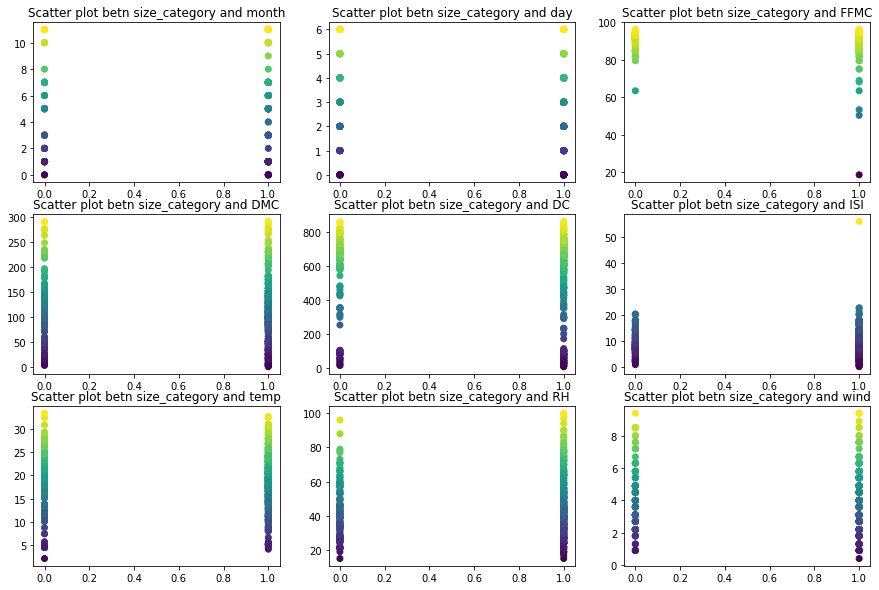

In [30]:
fig ,ax = plt.subplots(3,3, figsize=[15,10])

ax[0][0].scatter(data2.size_category, data2.month, c=data2['month'])
ax[0][0].set_title("Scatter plot betn size_category and month")

ax[0][1].scatter(data2.size_category,data2.day, c=data2['day'])
ax[0][1].set_title("Scatter plot betn size_category and day")

ax[0][2].scatter(data2.size_category,data2.FFMC, c=data2['FFMC'])
ax[0][2].set_title("Scatter plot betn size_category and FFMC")


ax[1][0].scatter(data2.size_category,data2.DMC, c=data2['DMC'])
ax[1][0].set_title("Scatter plot betn size_category and DMC")

ax[1][1].scatter(data2.size_category,data2.DC,c=data2['DC'])
ax[1][1].set_title("Scatter plot betn size_category and DC")

ax[1][2].scatter(data2.size_category,data2.ISI,c=data2['ISI'])
ax[1][2].set_title("Scatter plot betn size_category and ISI")


ax[2][0].scatter(data2.size_category,data2.temp,c=data2['temp'])
ax[2][0].set_title("Scatter plot betn size_category and temp")

ax[2][1].scatter(data2.size_category,data2.RH,c=data2['RH'])
ax[2][1].set_title("Scatter plot betn size_category and RH")

ax[2][2].scatter(data2.size_category,data2.wind,c=data2['wind'])
ax[2][2].set_title("Scatter plot betn size_category and wind")

Text(0.5, 1.0, 'histogram for area')

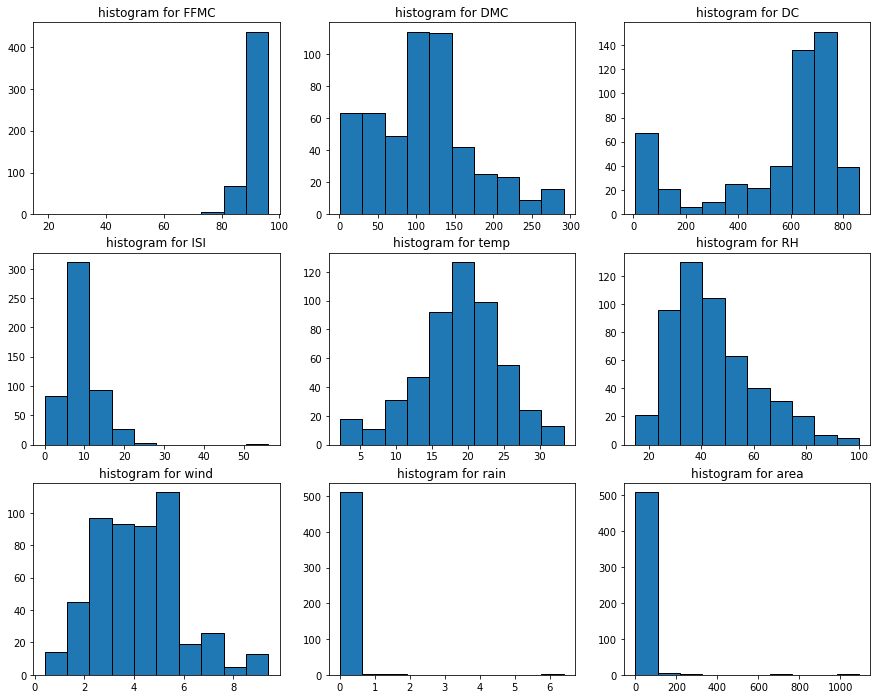

In [31]:
fig ,ax = plt.subplots(3,3, figsize=[15,12])

ax[0][0].hist(data2.FFMC, edgecolor='Black')
ax[0][0].set_title("histogram for FFMC")

ax[0][1].hist(data2.DMC,edgecolor='Black')
ax[0][1].set_title("histogram for DMC")

ax[0][2].hist(data2.DC,edgecolor='Black')
ax[0][2].set_title("histogram for DC")


ax[1][0].hist(data2.ISI,edgecolor='Black')
ax[1][0].set_title("histogram for ISI")

ax[1][1].hist(data2.temp,edgecolor='Black')
ax[1][1].set_title("histogram for temp")

ax[1][2].hist(data2.RH,edgecolor='Black')
ax[1][2].set_title("histogram for RH")


ax[2][0].hist(data2.wind,edgecolor='Black')
ax[2][0].set_title("histogram for wind")

ax[2][1].hist(data2.rain,edgecolor='Black')
ax[2][1].set_title("histogram for rain")

ax[2][2].hist(data2.area,edgecolor='Black')
ax[2][2].set_title("histogram for area")


In [32]:
data2.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot for area')

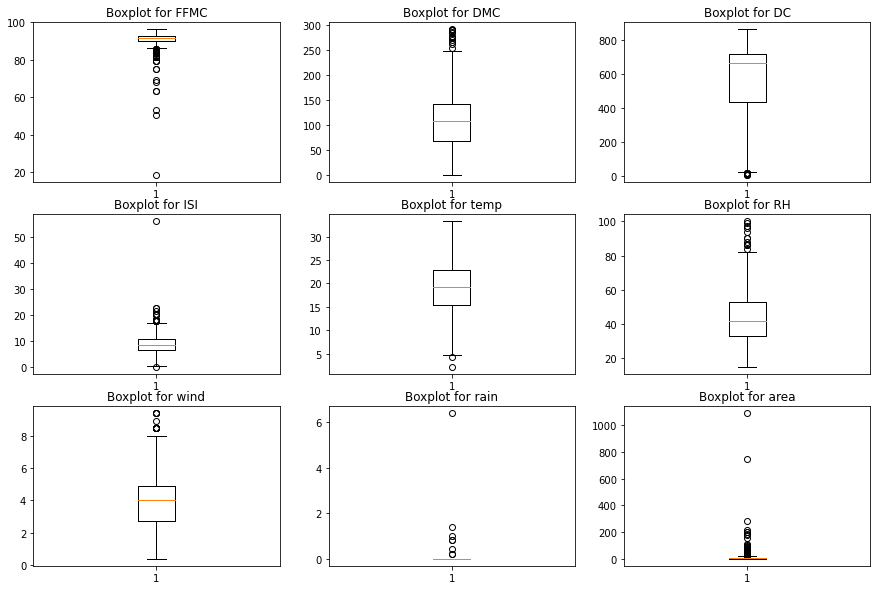

In [33]:
fig , ax =  plt.subplots(3,3, figsize=[15,10])

ax[0][0].boxplot(data2.FFMC)
ax[0][0].set_title("Boxplot for FFMC")

ax[0][1].boxplot(data.DMC)
ax[0][1].set_title("Boxplot for DMC")

ax[0][2].boxplot(data.DC)
ax[0][2].set_title("Boxplot for DC")

ax[1][0].boxplot(data2.ISI)
ax[1][0].set_title("Boxplot for ISI")

ax[1][1].boxplot(data.temp)
ax[1][1].set_title("Boxplot for temp")

ax[1][2].boxplot(data.RH)
ax[1][2].set_title("Boxplot for RH")

ax[2][0].boxplot(data2.wind)
ax[2][0].set_title("Boxplot for wind")

ax[2][1].boxplot(data.rain)
ax[2][1].set_title("Boxplot for rain")

ax[2][2].boxplot(data.area)
ax[2][2].set_title("Boxplot for area")

<AxesSubplot:>

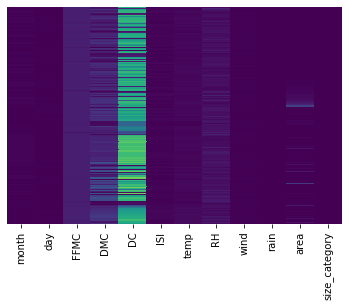

In [34]:
sn.heatmap(data2, yticklabels=False, cbar=False, cmap='viridis')

In [43]:
from sklearn.model_selection import GridSearchCV

In [41]:
X = data2.iloc[:,:-1]
Y = data2.iloc[:,-1]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [49]:
model = SVC()

In [59]:
parameter = { 'gamma' : np.array([50,100,150,200]),
            'C' :  np.array(range(5,30,5)),
            'kernel' : np.array(['linear', 'rbf'])}

parameter

{'gamma': array([ 50, 100, 150, 200]),
 'C': array([ 5, 10, 15, 20, 25]),
 'kernel': array(['linear', 'rbf'], dtype='<U6')}

In [60]:
fin_model=GridSearchCV(estimator=model, param_grid=parameter, n_jobs=-1)

In [61]:
fin_model.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 5, 10, 15, 20, 25]),
                         'gamma': array([ 50, 100, 150, 200]),
                         'kernel': array(['linear', 'rbf'], dtype='<U6')})

In [62]:
fin_model.best_params_

{'C': 10, 'gamma': 50, 'kernel': 'linear'}

In [63]:
y_pred = fin_model.predict(x_test)

In [64]:
accuracy = accuracy_score(y_pred, y_test)*100
accuracy

100.0